<a href="https://colab.research.google.com/github/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/1_TeoriaDeteccionMonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtración binaria óptima

# Principios en teoría de detección y reconocimiento de patrones (clasificación)

- Se presenta un ejemplo ilustrativo de detección de nive DC desde un problema de test de hipotésis.

- Además, se ilustra el concepto de simulaciones de Monte Carlo, como alternativa a la estimación de la distribución del estimador.


- Hipótesis nula: señal (datos) recibida es ruido.

$$H_o: x[n] = w[n]$$

- Hipótesis no nula: señal (datos) recibida es nivel DC más ruido.

$$H_1: x[n] = A + w[n]$$

**Nota**: en este caso se asume ruido blanco Gaussiano $w\sim \mathscr{N}(w|0,\sigma^2).$


- Para la simulación de Monte-Carlo con M repeticiones se utilizará un estimador de media simple:

 $$\hat{A}[m] = \frac{1}{N}\sum^N_{n=1} x[n]$$
 donde $\hat{A}_m$ corresponde a la $m$-ésima estimación sobre las $M$ iteraciones.

 - A partir del areglo de $M$ simulaciones de Monte Carlo, se puede utilizar un conteo simple (frecuencia relativa) para calcular la probabilidad de masa del estimador.

- Se compara la influencia en el estimador para $N =\{1,20\}$

- Se fijan $M = 100$ repeticiones del experimento de Monte Carlo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = 1 # nivel DC
N1 = 1 # muestras a considerar en la detección N=1
N2 = 20 # N=20
M = 100 # simulaciones monte carlo
varw = 0.5 #varianza del ruido
T1sr = np.zeros(M)
T2sr = np.zeros(M)
T1r = np.zeros(M)
T2r = np.zeros(M)

for m in range(M):#iteraciones de Monte Carlo
  w1 = np.sqrt(varw)*np.random.randn(N1) # ruido simulado para N = 1
  w2 = np.sqrt(varw)*np.random.randn(N2) # ruido simulado para N = 20
  x1 = A + w1 #señal recibida
  x2 = A + w2
  #detector sobre señal mas ruido
  T1sr[m] = x1.mean()
  T2sr[m] = x2.mean()
  #detector sobre solo ruido
  T1r[m] = w1.mean()
  T2r[m] = w2.mean()

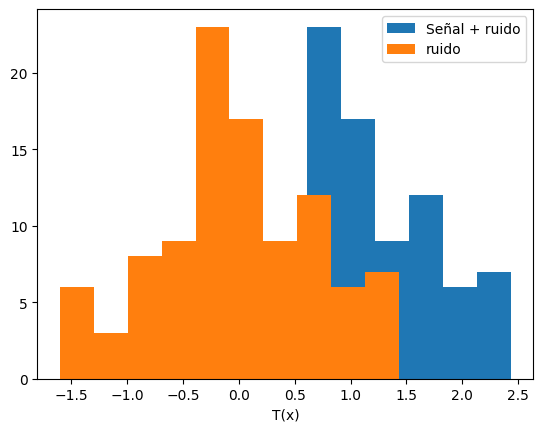

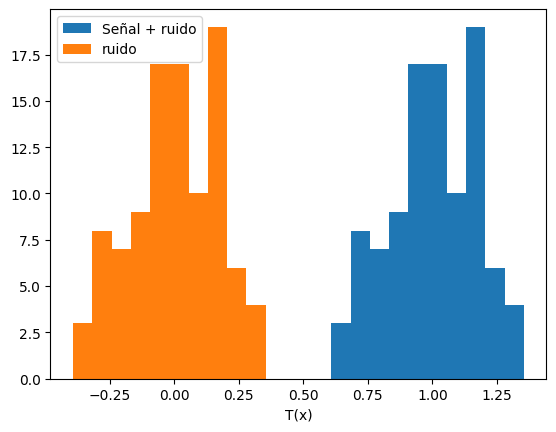

In [2]:
import matplotlib.pyplot as plt
#graficar las probabilidades del estimador
plt.hist(T1sr,label='Señal + ruido')
plt.hist(T1r,label='ruido')
plt.xlabel('T(x)')
plt.legend()
plt.show()

plt.hist(T2sr,label='Señal + ruido')
plt.hist(T2r,label='ruido')
plt.xlabel('T(x)')
plt.legend()
plt.show()

# Ejercicio:

1. Cálcule el coeficiente de desvio para los resultados obtenidos. Ver [Conceptos Teoría Detección](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/1_TeoriaDeteccion.pdf).

2. Compare la capacidad de detección del estimador $\tilde{A}=x[0]$ respecto al de media muestral $\hat{A} = \frac{1}{N}\sum^N_{n=1} x[n]$.

Estimador 1: sesgo = 0, Estimador 2: 0
Varianza 1: $\sigma^2$, Estimador 2: $\sigma^2/N$

$$mse(\hat{\theta})=var(\hat{\theta})+b^2(\hat{\theta})$$

In [4]:
varianza_ruido = 0.1  # Varianza asociada al ruido del sistema
num_muestras = 100  # Cantidad de muestras en el conjunto de datos

# Cálculo del coeficiente de desvío para los estimadores
d0 = np.sqrt(A**2)/varianza_ruido  # Coeficiente de desvío del estimador individual (x[0])
d1 = N2*np.sqrt(A**2)/varianza_ruido  # Coeficiente de desvío del estimador de la media muestral

# Cálculo del error cuadrático medio (MSE) para ambos estimadores
varianza_estimador1 = varianza_ruido  # Varianza del estimador individual
varianza_estimador2 = varianza_ruido / num_muestras  # Varianza del estimador de la media

# Ambos estimadores tienen sesgo cero, por lo que no se considera el sesgo en el cálculo del MSE
mse_estimador1 = varianza_estimador1  # MSE del estimador individual
mse_estimador2 = varianza_estimador2  # MSE del estimador de la media

# Coeficientes de desvío y MSE para ambos estimadores
coeficiente_desvio = {
    'Coeficiente de desvío estimador 1': d0,
    'Coeficiente de desvío estimador 2 (media muestral)': d1,
    'MSE Estimador 1': mse_estimador1,
    'MSE Estimador 2': mse_estimador2
}

coeficiente_desvio


{'Coeficiente de desvío estimador 1': 10.0,
 'Coeficiente de desvío estimador 2 (media muestral)': 200.0,
 'MSE Estimador 1': 0.1,
 'MSE Estimador 2': 0.001}